# __IBM Applier Data Science Capstone Course by Coursera__

## __Week 5 Final Project__

#### _Battle of London Boroughs: New Fitness Centre_

    -  Build a dataframe of boroughs of London, United Kingdom by loading data from public datasource
    -  Get geographical coordinates of boroughs
    -  Extract venue data using Foursquare API
    -  Explore and cluster boroughs
    -  Current market segmentation of London boroughs
    -  Next Steps
    

## 1. Import required libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import random # library for random number generation
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from scipy import stats

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
#to add legend on folium map
from branca.element import Template, MacroElement


# install seaborn
!conda install -c anaconda seaborn --yes

# import library
import seaborn as sns



import types
from botocore.client import Config
import ibm_boto3

print('Seaborn installed and imported!')
print('Folium installed')
print('Libraries imported.')
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be UPDATED:

  openssl               anaconda::openssl-1.1.1g-h7b6447c_0 --> conda-forge::openssl-1.1.1g-h516909a_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.6.24-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9f0ad1d_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> a

## 2. Load data from excel into a dataframe

In [17]:
df_data = pd.read_excel('london-borough-profiles.xlsx')

In [18]:
df_data.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015","Proportion of population aged 65 and over, 2015",Net internal migration (2015),Net international migration (2015),Net natural change (2015),% of resident population born abroad (2015),Unnamed: 16,Largest migrant population by country of birth (2011),% of largest migrant population (2011),Unnamed: 19,Second largest migrant population by country of birth (2011),% of second largest migrant population (2011),Unnamed: 22,Third largest migrant population by country of birth (2011),% of third largest migrant population (2011),Unnamed: 25,% of population from BAME groups (2016),% people aged 3+ whose main language is not English (2011 Census),"Overseas nationals entering the UK (NINo), (2015/16)","New migrant (NINo) rates, (2015/16)",Largest migrant population arrived during 2015/16,Second largest migrant population arrived during 2015/16,Third largest migrant population arrived during 2015/16,Employment rate (%) (2015),Male employment rate (2015),Female employment rate (2015),Unemployment rate (2015),Youth Unemployment (claimant) rate 18-24 (Dec-15),Proportion of 16-18 year olds who are NEET (%) (2014),Proportion of the working-age population who claim out-of-work benefits (%) (May-2016),% working-age with a disability (2015),Proportion of working age people with no qualifications (%) 2015,Proportion of working age with degree or equivalent and above (%) 2015,"Gross Annual Pay, (2016)",Gross Annual Pay - Male (2016),Gross Annual Pay - Female (2016),Modelled Household median income estimates 2012/13,% adults that volunteered in past 12 months (2010/11 to 2012/13),Number of jobs by workplace (2014),% of employment that is in public sector (2014),"Jobs Density, 2015","Number of active businesses, 2015",Two-year business survival rates (started in 2013),Crime rates per thousand population 2014/15,Fires per thousand population (2014),Ambulance incidents per hundred population (2014),"Median House Price, 2015","Average Band D Council Tax charge (£), 2015/16",New Homes (net) 2015/16 (provisional),"Homes Owned outright, (2014) %","Being bought with mortgage or loan, (2014) %","Rented from Local Authority or Housing Association, (2014) %","Rented from Private landlord, (2014) %","% of area that is Greenspace, 2005",Total carbon emissions (2014),"Household Waste Recycling Rate, 2014/15","Number of cars, (2011 Census)","Number of cars per household, (2011 Census)","% of adults who cycle at least once per month, 2014/15","Average Public Transport Accessibility score, 2014","Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14",Rates of Children Looked After (2016),% of pupils whose first language is not English (2015),% children living in out-of-work households (2015),"Male life expectancy, (2012-14)","Female life expectancy, (2012-14)",Teenage conception rate (2014),Life satisfaction score 2011-14 (out of 10),Worthwhileness score 2011-14 (out of 10),Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%)
0,E09000001,E09000001,City of London,Inner London,8800,5325.817690,290.3934,30.303719,43.2,11.4,73.1,15.5,-7,665,30,.,NaN,United States,2.779661,0.000000,France,1.993220,0.000000,Australia,1.857627,0.000000,27.467487,17.138103,975,152.224824,India,France,United States,64.6,.,.,.,1.633987,.,3.434817,.,.,.,.,.,.,63620,.,500400,3.424988,84.29,26130,64.3,.,12.278481,.,799999,931.20,80,.,.,.,.,4.8,1036.109362,34.4,1692,0.385861,16.853175,7.862302,78.6,101,.,7.908612,.,.,.,6.59,7.08,5.99,5.57,NaN,2.637945
1,E09000002,E09000002,Barking and Dagenham,Outer London,209000,78188.376723,3610.7817,57.882203,32.9,27.2,63.1,9.7,-1176,2509,2356,37.8,79002.0,Nig

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 83 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Code                                                                                              33 non-null     object 
 1   New code                                                                                          33 non-null     object 
 2   Area name                                                                                         33 non-null     object 
 3   Inner/ Outer London                                                                               33 non-null     object 
 4   GLA Population Estimate 2017                                                                      33 non-null     int64  
 5   GLA

In [20]:
# Give proper names to the columns and drop irrelevant columns
df_data.rename(columns = {'Area name': 'Borough', 'GLA Population Estimate 2017': 'Total_Population', 'GLA Household Estimate 2017': 'Number_Of_Households', 'Population density (per hectare) 2017': 'Population_Density(per hectare)', 'Average Age, 2017': 'Average_Age','Proportion of population aged 0-15, 2015': '%Population_Aged(0-15)', 'Proportion of population of working-age, 2015': '%Population_WorkingAge', 
                         'Proportion of population aged 65 and over, 2015': '%Population_Aged(65+)','% of resident population born abroad (2015)': '%Population_BornAbroad', '% of population from BAME groups (2016)': '%Population_BAME', 
                         'Employment rate (%) (2015)': 'Employment_Rate','Modelled Household median income estimates 2012/13': 'Median_Household_Income', 'Number of active businesses, 2015': 'Number_Active_Businesses' }, inplace = True)

In [21]:
df_data.drop(df_data.columns[[3,6,12,13,14,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,43,44,45,47,48,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82]], axis = 1, inplace = True)
df_data.head()

,Code,New code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,%Population_Aged(0-15),%Population_WorkingAge,%Population_Aged(65+),%Population_BornAbroad,%Population_BAME,Employment_Rate,Median_Household_Income,Number_Active_Businesses
0,E09000001,E09000001,City of London,8800,5325.817690,30.303719,43.2,11.4,73.1,15.5,.,27.467487,64.6,63620,26130
1,E09000002,E09000002,Barking and Dagenham,209000,78188.376723,57.882203,32.9,27.2,63.1,9.7,37.8,49.531763,65.8,29420,6560
2,E09000003,E09000003,Barnet,389600,151422.963691,44.911536,37.3,21.1,64.9,14.0,35.2,38.663734,68.5,40530,26190
3,E09000004,E09000004,Bexley,244300,97735.840946,40.326396,39.0,20.6,62.9,16.6,16.1,21.406266,75.1,36990,9075
4,E09000005,E09000005,Brent,332100,121048.274678,76.816966,35.6,20.9,67.8,11.3,53.9,64.856339,69.5,32140,15745


In [22]:
df_data.head()

,Code,New code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,%Population_Aged(0-15),%Population_WorkingAge,%Population_Aged(65+),%Population_BornAbroad,%Population_BAME,Employment_Rate,Median_Household_Income,Number_Active_Businesses
0,E09000001,E09000001,City of London,8800,5325.817690,30.303719,43.2,11.4,73.1,15.5,.,27.467487,64.6,63620,26130
1,E09000002,E09000002,Barking and Dagenham,209000,78188.376723,57.882203,32.9,27.2,63.1,9.7,37.8,49.531763,65.8,29420,6560
2,E09000003,E09000003,Barnet,389600,151422.963691,44.911536,37.3,21.1,64.9,14.0,35.2,38.663734,68.5,40530,26190
3,E09000004,E09000004,Bexley,244300,97735.840946,40.326396,39.0,20.6,62.9,16.6,16.1,21.406266,75.1,36990,9075
4,E09000005,E09000005,Brent,332100,121048.274678,76.816966,35.6,20.9,67.8,11.3,53.9,64.856339,69.5,32140,15745


In [23]:
#Change proper datatype and replacing '.' with average of rest of the values
df_data.at[0,'%Population_BornAbroad'] = 0
df_data['%Population_BornAbroad'] = df_data['%Population_BornAbroad'].astype(float)
m1= df_data['%Population_BornAbroad'].mean()
df_data.at[0,'%Population_BornAbroad'] = m1

In [24]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code                             33 non-null     object 
 1   New code                         33 non-null     object 
 2   Borough                          33 non-null     object 
 3   Total_Population                 33 non-null     int64  
 4   Number_Of_Households             33 non-null     float64
 5   Population_Density(per hectare)  33 non-null     float64
 6   Average_Age                      33 non-null     float64
 7   %Population_Aged(0-15)           33 non-null     float64
 8   %Population_WorkingAge           33 non-null     float64
 9   %Population_Aged(65+)            33 non-null     float64
 10  %Population_BornAbroad           33 non-null     float64
 11  %Population_BAME                 33 non-null     float64
 12  Employment_Rate         

In [25]:
#Convert % into actual numbers
df_data['Population_Aged(0-15)'] = df_data['Total_Population']*df_data['%Population_Aged(0-15)']/100
df_data['Population_WorkingAge'] = df_data['Total_Population']*df_data['%Population_WorkingAge']/100
df_data['Population_Aged(65+)'] = df_data['Total_Population']*df_data['%Population_Aged(65+)']/100
df_data['Migrant_Population'] = df_data['Total_Population']*df_data['%Population_BornAbroad']/100
df_data['BAME_Population'] = df_data['Total_Population']*df_data['%Population_BAME']/100
df_data['Employed_Population'] = df_data['Total_Population']*df_data['Employment_Rate']/100
df_data.head()

,Code,New code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,%Population_Aged(0-15),%Population_WorkingAge,%Population_Aged(65+),%Population_BornAbroad,%Population_BAME,Employment_Rate,Median_Household_Income,Number_Active_Businesses,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population
0,E09000001,E09000001,City of London,8800,5325.817690,30.303719,43.2,11.4,73.1,15.5,35.406061,27.467487,64.6,63620,26130,1003.2,6432.8,1364.0,3115.733333,2417.138867,5684.8
1,E09000002,E09000002,Barking and Dagenham,209000,78188.376723,57.882203,32.9,27.2,63.1,9.7,37.800000,49.531763,65.8,29420,6560,56848.0,131879.0,20273.0,79002.000000,103521.385448,137522.0
2,E09000003,E09000003,Barnet,389600,151422.963691,44.911536,37.3,21.1,64.9,14.0,35.200000,38.663734,68.5,40530,26190,82205.6,252850.4,54544.0,137139.200000,150633.907457,266876.0
3,E09000004,E09000004,Bexley,244300,97735.840946,40.326396,39.0,20.6,62.9,16.6,16.100000,21.406266,75.1,36990,9075,50325.8,153664.7,40553.8,39332.300000,52295.507237,183469.3
4,E09000005,E09000005,Brent,332100,121048.274678,76.816966,35.6,20.9,67.8,11.3,53.900000,64.856339,69.5,32140,15745,69408.9,225163.8,37527.3,179001.900000,215387.902594,230809.5


In [26]:
New_df = df_data[['Code','Borough','Total_Population','Number_Of_Households','Population_Density(per hectare)','Average_Age','Population_Aged(0-15)',
                 'Population_WorkingAge','Population_Aged(65+)','Migrant_Population','BAME_Population','Employed_Population','Median_Household_Income','Number_Active_Businesses']]

In [27]:
New_df.head()

,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses
0,E09000001,City of London,8800,5325.817690,30.303719,43.2,1003.2,6432.8,1364.0,3115.733333,2417.138867,5684.8,63620,26130
1,E09000002,Barking and Dagenham,209000,78188.376723,57.882203,32.9,56848.0,131879.0,20273.0,79002.000000,103521.385448,137522.0,29420,6560
2,E09000003,Barnet,389600,151422.963691,44.911536,37.3,82205.6,252850.4,54544.0,137139.200000,150633.907457,266876.0,40530,26190
3,E09000004,Bexley,244300,97735.840946,40.326396,39.0,50325.8,153664.7,40553.8,39332.300000,52295.507237,183469.3,36990,9075
4,E09000005,Brent,332100,121048.274678,76.816966,35.6,69408.9,225163.8,37527.3,179001.900000,215387.902594,230809.5,32140,15745


In [28]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code                             33 non-null     object 
 1   Borough                          33 non-null     object 
 2   Total_Population                 33 non-null     int64  
 3   Number_Of_Households             33 non-null     float64
 4   Population_Density(per hectare)  33 non-null     float64
 5   Average_Age                      33 non-null     float64
 6   Population_Aged(0-15)            33 non-null     float64
 7   Population_WorkingAge            33 non-null     float64
 8   Population_Aged(65+)             33 non-null     float64
 9   Migrant_Population               33 non-null     float64
 10  BAME_Population                  33 non-null     float64
 11  Employed_Population              33 non-null     float64
 12  Median_Household_Income 

In [29]:
# Normalise Data for columns- 

New_df['Total_Population']=New_df['Total_Population']/New_df['Total_Population'].max()
New_df['Number_Of_Households']=New_df['Number_Of_Households']/New_df['Number_Of_Households'].max()
New_df['Population_Density(per hectare)']=New_df['Population_Density(per hectare)']/New_df['Population_Density(per hectare)'].max()
New_df['Average_Age']=New_df['Average_Age']/New_df['Average_Age'].max()
New_df['Population_Aged(0-15)']=New_df['Population_Aged(0-15)']/New_df['Population_Aged(0-15)'].max()
New_df['Population_WorkingAge']=New_df['Population_WorkingAge']/New_df['Population_WorkingAge'].max()
New_df['Population_Aged(65+)']=New_df['Population_Aged(65+)']/New_df['Population_Aged(65+)'].max()
New_df['Migrant_Population']=New_df['Migrant_Population']/New_df['Migrant_Population'].max()
New_df['BAME_Population']=New_df['BAME_Population']/New_df['BAME_Population'].max()
New_df['Employed_Population']=New_df['Employed_Population']/New_df['Employed_Population'].max()
New_df['Median_Household_Income']=New_df['Median_Household_Income']/New_df['Median_Household_Income'].max()
New_df['Number_Active_Businesses']=New_df['Number_Active_Businesses']/New_df['Number_Active_Businesses'].max()
New_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tr

,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses
0,E09000001,City of London,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788
1,E09000002,Barking and Dagenham,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444
2,E09000003,Barnet,1.000000,0.952285,0.288597,0.863426,0.966783,1.000000,0.950534,0.739259,0.601304,0.915775,0.637064,0.472872
3,E09000004,Bexley,0.627053,0.614652,0.259133,0.902778,0.591859,0.607730,0.706728,0.212024,0.208754,0.629568,0.581421,0.163853
4,E09000005,Brent,0.852413,0.761262,0.493617,0.824074,0.816287,0.890502,0.653985,0.964924,0.859791,0.792014,0.505187,0.284283


## 3. Get geographical coordinates for all Boroughs and view on map

In [30]:
# Getting coordinates of London

address = 'London, UK'
geolocator = Nominatim(user_agent = 'Lon_explorer')
location = geolocator.geocode(address)
London_latitude = location.latitude 
London_longitude = location.longitude
print ('The geographical coordinate of London are {},{}.'.format(London_latitude, London_longitude))


The geographical coordinate of London are 51.5073219,-0.1276474.


In [32]:
def latlon (df):
    for i in range (33):
        address = df['Borough'][i] + ', UK'
        geolocator = Nominatim(user_agent = 'Lon_explorer')
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df.loc[i, 'Latitude'] = latitude
        df.loc[i, 'Longitude'] = longitude
    return(df)
    

In [33]:
New_df = latlon(New_df)
New_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude
0,E09000001,City of London,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998
1,E09000002,Barking and Dagenham,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444,51.554117,0.150504
2,E09000003,Barnet,1.000000,0.952285,0.288597,0.863426,0.966783,1.000000,0.950534,0.739259,0.601304,0.915775,0.637064,0.472872,51.653090,-0.200226
3,E09000004,Bexley,0.627053,0.614652,0.259133,0.902778,0.591859,0.607730,0.706728,0.212024,0.208754,0.629568,0.581421,0.163853,51.441679,0.150488
4,E09000005,Brent,0.852413,0.761262,0.493617,0.824074,0.816287,0.890502,0.653985,0.964924,0.859791,0.792014,0.505187,0.284283,51.441635,0.234519


#### Let us view this data on a map

In [34]:
# Create London Map
London_map = folium.Map(location=[London_latitude, London_longitude], zoom_start=11)

# create map and display it
London_map = folium.Map(location=[London_latitude, London_longitude], zoom_start=11)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(New_df.Latitude, New_df.Longitude, New_df.Borough):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='Blue',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.3
    ).add_to(London_map)

# show map
London_map


## 4. Extract venues data for all Boroughs using Foursquare API

In [35]:
## Define Forusqure credentials
CLIENT_ID = 'QXLPVDIMSUE5P4NERYCZMIFL54FYBMTKTCVO3KZQHIETQ202' # your Foursquare ID
CLIENT_SECRET = 'DAWBKYV2JAVIU1VJWGQA3SK2DI30W2RTADASE2LBFTOWVTDT' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QXLPVDIMSUE5P4NERYCZMIFL54FYBMTKTCVO3KZQHIETQ202
CLIENT_SECRET:DAWBKYV2JAVIU1VJWGQA3SK2DI30W2RTADASE2LBFTOWVTDT


#### Explore all neighborhoods of London to get nearby venues

In [36]:
def getNearbyVenues (names, latitude, longitude, radius = 2500, LIMIT = 500):
    venues_list = []
    ## Define Forusqure credentials
    CLIENT_ID = 'QXLPVDIMSUE5P4NERYCZMIFL54FYBMTKTCVO3KZQHIETQ202' # your Foursquare ID
    CLIENT_SECRET = 'DAWBKYV2JAVIU1VJWGQA3SK2DI30W2RTADASE2LBFTOWVTDT' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    for name, lat, lng in zip(names, latitude, longitude):
        #print (name)
        
        #create the API request url
        url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url1).json()["response"]['groups'][0]['items']
    
        #return only relevant informatin
        venues_list.append([(name, lat, lng, v['venue']['id'], v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Borough', 'Borough Latitude', 'Borough Longitude', 'Venue_id','Venue', 'Venue Latitude','Venue Longitude', 'Venue Category']
    return(nearby_venues)

In [37]:
London_venues = getNearbyVenues(names = New_df['Borough'], latitude = New_df['Latitude'], longitude = New_df['Longitude'])

In [38]:
London_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City of London,51.515618,-0.091998,58933377469aef72f3707afe,The Ned Hotel,51.513755,-0.090067,Hotel
1,City of London,51.515618,-0.091998,53b15736498e1cdd0eb1d95b,The Merchant House,51.513264,-0.093039,Cocktail Bar
2,City of London,51.515618,-0.091998,4d9f608b0ea841bde47adbd7,M&S Simply Food,51.513590,-0.095297,Grocery Store
3,City of London,51.515618,-0.091998,5a8fda2d9e3b652cb8ae5068,Rosslyn,51.512574,-0.093381,Coffee Shop
4,City of London,51.515618,-0.091998,4f5cf385e4b0c5418c18966b,One New Change Rooftop,51.513912,-0.095775,Roof Deck


In [39]:
London_venues.shape

(2605, 8)

In [40]:
# lets create new parent category
London_venues['Parent_Category'] = ""

In [41]:
list = London_venues[London_venues.Parent_Category == ""]
list['Venue Category'].unique()

array(['Hotel', 'Cocktail Bar', 'Grocery Store', 'Coffee Shop',
       'Roof Deck', 'Butcher', 'Performing Arts Venue', 'Art Gallery',
       'Gym / Fitness Center', 'Theater', 'Falafel Restaurant',
       'Botanical Garden', 'Boxing Gym', 'Scenic Lookout', 'Whisky Bar',
       'Trail', 'Bar', 'Garden', 'Street Food Gathering', 'Beer Bar',
       'Wine Bar', 'Art Museum', 'Farmers Market', 'Café', 'Burger Joint',
       'Cheese Shop', 'Seafood Restaurant', 'Empanada Restaurant',
       'Italian Restaurant', 'Food Truck', 'Flea Market', 'Steakhouse',
       'Sushi Restaurant', 'Indian Restaurant', 'Portuguese Restaurant',
       'Breakfast Spot', 'Food Stand', 'Castle', 'Bike Shop', 'Gift Shop',
       'Modern European Restaurant', 'Salon / Barbershop',
       'Middle Eastern Restaurant', 'Record Shop', 'Circus School',
       'Chocolate Shop', 'Exhibit', 'Bookstore', 'Restaurant',
       'History Museum', 'French Restaurant', 'Social Club',
       'Pizza Place', 'Bakery', 'BBQ Joint', 

In [42]:
search_values = ['Comic Shop','Lingerie Store','Thrift / Vintage Store','Warehouse Store','Speakeasy','Bridal Shop','Furniture','Shoe','Gift','Optical',
                 'Women','Clothing','Electronic','Toy','Hobby','Book',
                 'Bookstore','Shopping', 'Music Store', 'Video', 'Goods','Mobile Phone','Bike Shop','Plaza','Cosmetics','Spa','Antique','Boutique']
for i in search_values:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Fashion"

search_values1 = ['Campground','Social Club', 'Nail Salon','Go Kart Track','Outdoors & Recreation', 'Harbor / Marina', 'Zoo Exhibit', 'Zoo','Castle', 'Circus School', 'Souvlaki Shop', 'Racetrack', 'Lake','Fountain', 'Palace','Music Venue', 'Recreation Center', 'Strip Club', 'Opera House', 'Recording Studio', 'Rock Club','Beach','Comedy Club',
                  'Boat or Ferry', 'Pool', 'Poke Place', 'Distillery','Roof Deck', 'Lounge','Tourist Information Center', 'Jazz Club','Planetarium', 'Observatory', 'Scenic Lookout',
                  'Church','Nightclub','Bowling','Arts','Wings', 'Theater', 'Art','Street Art','Entertainment','Vacation','Monument','Concert','Museum','Canal','Gaming',
                  'Sculpture', 'Historic','Multiplex','Acquarium']
for i in search_values1:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Leisure"
    
search_values2 = ['Liquor Store', 'Brewery','Wine','Bar','Pub','pub','Beer']
for i in search_values2:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Bar"

search_values3 = ['Gourmet Shop','Diner','Chaat Place','Cheese Shop','Bagel Shop','Tea Room','Snack Place','Salad Place','Creperie','Donut','Cafeteria','Pie','Chocolate','Restaurant',
                  'Café','Breakfast','Noodle','Bakery','Burger','Coffee','Dessert','Food','Fish & Chips','Juice','Pizza','Sandwich','Smoothie','Steakhouse', 'Ice Cream',
                  'Burrito','Cupcake','Deli','Bistro','Fried']
for i in search_values3:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Food"    
    
search_values4 = ['Hardware Store','Candy Store','Paper / Office Supplies Store','Butcher','Herbs & Spices Store', 'Pet Store', 'Fruit & Vegetable Store', 'Discount', 'Convenience','Supermarket',
                  'Stationery','Department','Grocery','Pharmacy','Market']
for i in search_values4:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Supermarket"
    
search_values5 = ['Nursery School', 'Rental Car Location','Airport Terminal', 'Exhibit','Auto Workshop','University', 'Light Rail Station', 'Waterfront', 'Port','Business Service','BBQ Joint', 'Town Hall','Boarding House','Tunnel','Gas Station','Residential Building','Hostel', 'Auto Garage', 'Miscellaneous Shop','Insurance Office', 
                  'Tram Station','Farm', 'Event Service', 'Home Service', 'Train Station', 'Bus Stop', 'Hotel', 'Bubble Tea Shop',
       'Record Shop', 'Locksmith', 'Kitchen Supply Store', 'Arcade',
       'Aquarium', 'Metro Station', 'Bus Station','Construction', 'Platform', "Men's Store", 'Film Studio', 'Accessories Store', 'Cruise',
       'Forest']
for i in search_values5:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Other"
    
search_values6 = ['Health & Beauty Service', 'Nature Preserve', 'Playground', 'Indoor Play Area', 'Yoga','Garden', 'Park']
for i in search_values6:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Wellbeing"
    
search_values7 = ['Rugby Pitch', 'Tennis Stadium', 'Cricket Ground','Gym','Pilates Studio', 'Soccer','Athletics & Sports', 'Cycle Studio', 'Rugby Stadium', 'Hockey Field', 
                  'Track Stadium', 'Tennis Court']
for i in search_values7:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Active Sports"
    
search_values8 = ['Other Great Outdoors', 'Dance Studio', 'Skating Rink', 'Massage Studio','Sports Club', 'Trail', 'Mini Golf', 'Golf Course','Golf Driving Range']
for i in search_values8:
    London_venues["Parent_Category"][London_venues['Venue Category'].str.contains(i)] = "Recreational Sports"
    
London_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launc

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category
0,City of London,51.515618,-0.091998,58933377469aef72f3707afe,The Ned Hotel,51.513755,-0.090067,Hotel,Other
1,City of London,51.515618,-0.091998,53b15736498e1cdd0eb1d95b,The Merchant House,51.513264,-0.093039,Cocktail Bar,Bar
2,City of London,51.515618,-0.091998,4d9f608b0ea841bde47adbd7,M&S Simply Food,51.513590,-0.095297,Grocery Store,Supermarket
3,City of London,51.515618,-0.091998,5a8fda2d9e3b652cb8ae5068,Rosslyn,51.512574,-0.093381,Coffee Shop,Food
4,City of London,51.515618,-0.091998,4f5cf385e4b0c5418c18966b,One New Change Rooftop,51.513912,-0.095775,Roof Deck,Leisure


In [43]:
list = London_venues[London_venues.Parent_Category == ""]
list['Venue Category'].unique()

array([], dtype=object)

In [44]:
London_venues.groupby(['Parent_Category']).count()

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category
Parent_Category,,,,,,,,
Active Sports,86,86,86,86,86,86,86,86
Bar,388,388,388,388,388,388,388,388
Fashion,191,191,191,191,191,191,191,191
Food,1071,1071,1071,1071,1071,1071,1071,1071
Leisure,237,237,237,237,237,237,237,237
Other,184,184,184,184,184,184,184,184
Recreational Sports,28,28,28,28,28,28,28,28
Supermarket,229,229,229,229,229,229,229,229
Wellbeing,191,191,191,191,191,191,191,191


## 5. Filter venues with only fitness related categories: Active Sports, Recreational Sports & Wellbeing

In [45]:
Fitness_venues = London_venues[London_venues['Parent_Category'].isin(['Active Sports', 'Recreational Sports','Wellbeing'])].reset_index(drop = True)
Fitness_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category
0,City of London,51.515618,-0.091998,4fc31eede4b05b8503be268b,Virgin Active,51.517952,-0.097651,Gym / Fitness Center,Active Sports
1,City of London,51.515618,-0.091998,4bf7edc04a67c928825c24cf,Barbican Conservatory,51.519859,-0.093202,Botanical Garden,Wellbeing
2,City of London,51.515618,-0.091998,55e5df82498e9f0b8a9b9606,1Rebel,51.518378,-0.083861,Boxing Gym,Active Sports
3,City of London,51.515618,-0.091998,51797f6be4b06c63fd263c8c,Cyclebeat,51.511686,-0.086461,Gym / Fitness Center,Active Sports
4,City of London,51.515618,-0.091998,53749f5c498e46fef6b4c193,1Rebel,51.515569,-0.080040,Gym / Fitness Center,Active Sports


In [46]:
Fitness_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Borough            305 non-null    object 
 1   Borough Latitude   305 non-null    float64
 2   Borough Longitude  305 non-null    float64
 3   Venue_id           305 non-null    object 
 4   Venue              305 non-null    object 
 5   Venue Latitude     305 non-null    float64
 6   Venue Longitude    305 non-null    float64
 7   Venue Category     305 non-null    object 
 8   Parent_Category    305 non-null    object 
dtypes: float64(4), object(5)
memory usage: 21.6+ KB


In [47]:
Fitness_venues['Parent_CatID']= ""

search_values1 = ['Active Sports']
for i in search_values1:
    Fitness_venues['Parent_CatID'][Fitness_venues['Parent_Category'].str.contains(i)] = 1
search_values2 = ['Recreational Sports']
for i in search_values2:
    Fitness_venues['Parent_CatID'][Fitness_venues['Parent_Category'].str.contains(i)] = 2
search_values3 = ['Wellbeing']
for i in search_values3:
    Fitness_venues["Parent_CatID"][Fitness_venues['Parent_Category'].str.contains(i)] = 3    


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by Interac

In [48]:
Fitness_venues['Parent_CatID']=Fitness_venues['Parent_CatID'].astype(str).astype(int)

In [49]:
Fitness_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Borough            305 non-null    object 
 1   Borough Latitude   305 non-null    float64
 2   Borough Longitude  305 non-null    float64
 3   Venue_id           305 non-null    object 
 4   Venue              305 non-null    object 
 5   Venue Latitude     305 non-null    float64
 6   Venue Longitude    305 non-null    float64
 7   Venue Category     305 non-null    object 
 8   Parent_Category    305 non-null    object 
 9   Parent_CatID       305 non-null    int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 24.0+ KB


In [50]:
print('There are {} uniques categories.'.format(len(Fitness_venues['Venue Category'].unique())))

There are 34 uniques categories.


## 6. Exploratory Data Analysis

In [51]:
#merge both df
Fitnessvenues_df = Fitness_venues.join(New_df.set_index('Borough'), on = 'Borough')
Fitnessvenues_df.head()

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category,Parent_CatID,Code,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude
0,City of London,51.515618,-0.091998,4fc31eede4b05b8503be268b,Virgin Active,51.517952,-0.097651,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998
1,City of London,51.515618,-0.091998,4bf7edc04a67c928825c24cf,Barbican Conservatory,51.519859,-0.093202,Botanical Garden,Wellbeing,3,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998
2,City of London,51.515618,-0.091998,55e5df82498e9f0b8a9b9606,1Rebel,51.518378,-0.083861,Boxing Gym,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998
3,City of London,51.515618,-0.091998,51797f6be4b06c63fd263c8c,Cyclebeat,51.511686,-0.086461,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998
4,City of London,51.515618,-0.091998,53749f5c498e46fef6b4c193,1Rebel,51.515569,-0.080040,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998


#### Let us check correlation between other variables and Parent Category

In [52]:
Fitnessvenues_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Borough                          305 non-null    object 
 1   Borough Latitude                 305 non-null    float64
 2   Borough Longitude                305 non-null    float64
 3   Venue_id                         305 non-null    object 
 4   Venue                            305 non-null    object 
 5   Venue Latitude                   305 non-null    float64
 6   Venue Longitude                  305 non-null    float64
 7   Venue Category                   305 non-null    object 
 8   Parent_Category                  305 non-null    object 
 9   Parent_CatID                     305 non-null    int64  
 10  Code                             305 non-null    object 
 11  Total_Population                 305 non-null    float64
 12  Number_Of_Households  

AttributeError: 'function' object has no attribute 'set_xticklabels'

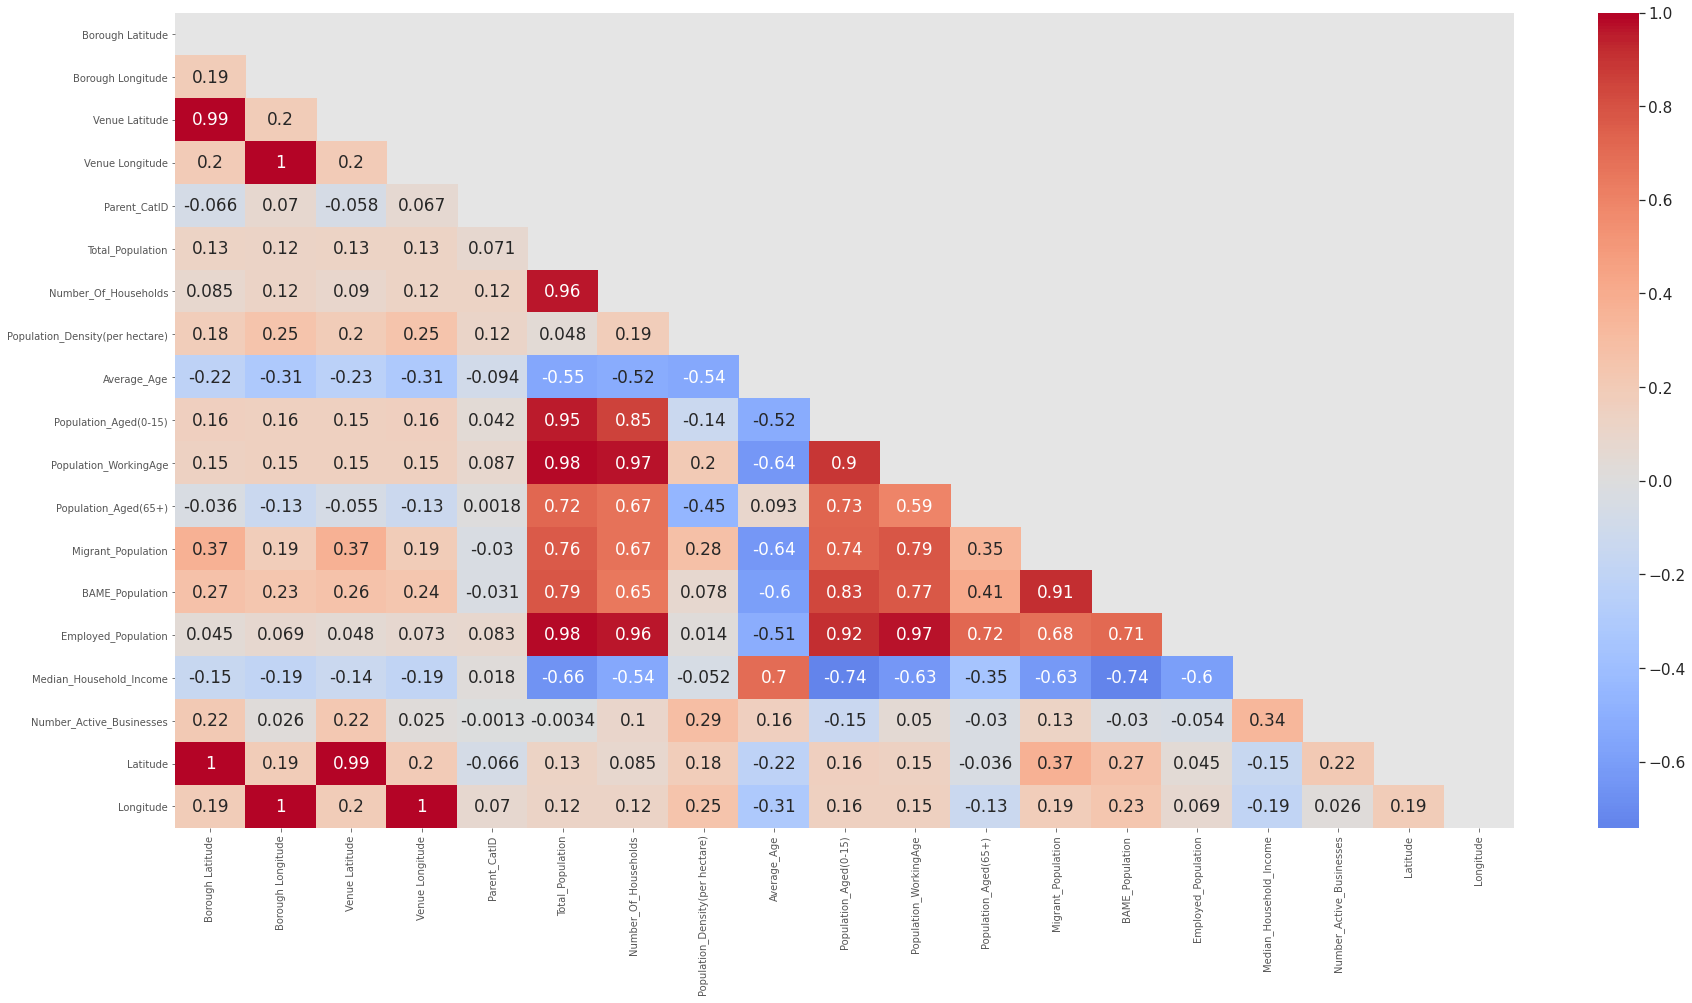

In [53]:
#Correlation with heatmap. Top & bottom cell cut off issue is due to Matplotlib version. it is fixed in version 3.1.2
fig, ax = plt.subplots(figsize = (30,15))
sns.set(font_scale=1.4)
matrix = np.triu(Fitnessvenues_df.corr())
annot_kws = {"ha": 'center',"va": 'center'}
sns.heatmap(Fitnessvenues_df.corr(), annot= True, center = 0, cmap = 'coolwarm', mask=matrix, annot_kws=annot_kws)
sns.heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 22)

#### Let us check the total number of venues by borough 

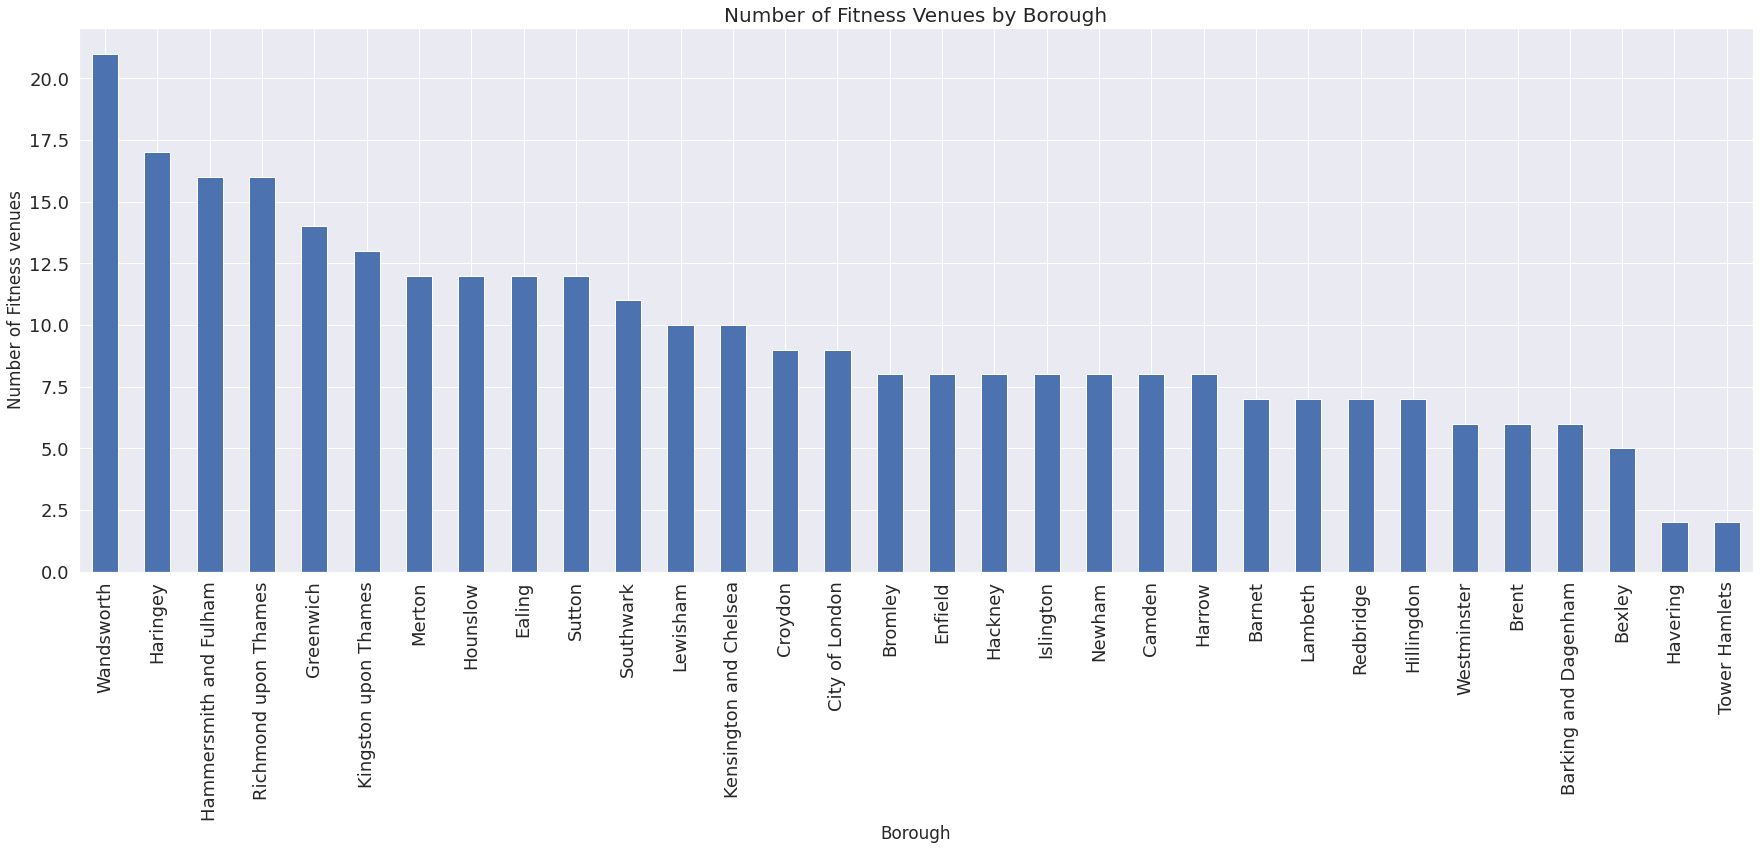

In [54]:
# Plotting a Histogram
Fitnessvenues_df.Borough.value_counts().nlargest(200).plot(kind='bar', figsize=(30,10), fontsize = 18)
plt.title('Number of Fitness Venues by Borough', fontsize = 20)
plt.ylabel('Number of Fitness venues')
plt.xlabel('Borough')
plt.show()

In [55]:
Fitnessvenues_df.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category,Parent_CatID,Code,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude
Borough,,,,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Barnet,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Bexley,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Brent,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bromley,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Camden,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
City of London,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Croydon,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Ealing,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [56]:
Fitnessvenues_df['Borough'].nunique()

32

#### Let us check the number of venues by fitness category for each borough

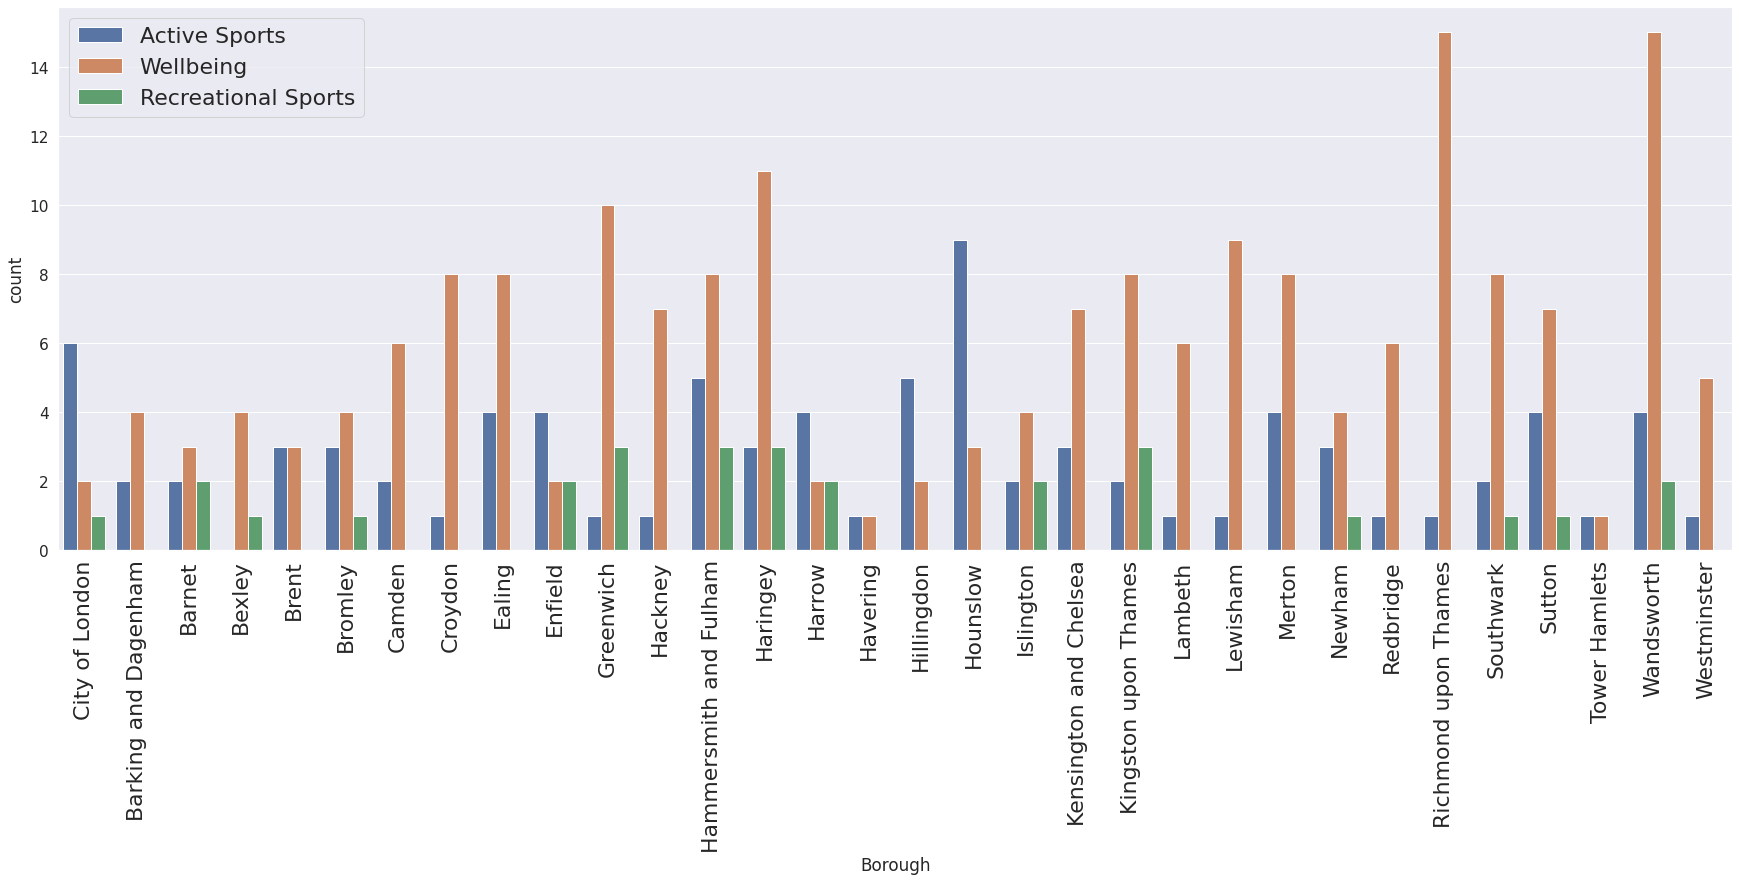

In [57]:
plt.figure(figsize = (30,10))
ax = sns.countplot(x="Borough", hue="Parent_Category", data=Fitnessvenues_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 22)
plt.legend(fontsize = 22)

#### Ranking 1st, 2nd and 3rd fitness category for each borough 

In [58]:
# One Hot Encoding for Parent Category
FitnessVenue_onehot = pd.get_dummies(Fitnessvenues_df[['Parent_Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
FitnessVenue_onehot['Borough'] = Fitnessvenues_df['Borough'] 

# move Borough column to the first column
FitnessVenue_onehot = FitnessVenue_onehot[['Borough', 'Active Sports', 'Recreational Sports','Wellbeing']]
FitnessVenue_onehot.head()

,Borough,Active Sports,Recreational Sports,Wellbeing
0,City of London,1,0,0
1,City of London,0,0,1
2,City of London,1,0,0
3,City of London,1,0,0
4,City of London,1,0,0


In [59]:
FitnessVenue_onehot.shape

(305, 4)

In [60]:
Fitness_grouped = FitnessVenue_onehot.groupby('Borough').mean().reset_index()
Fitness_grouped

,Borough,Active Sports,Recreational Sports,Wellbeing
0,Barking and Dagenham,0.333333,0.000000,0.666667
1,Barnet,0.285714,0.285714,0.428571
2,Bexley,0.000000,0.200000,0.800000
3,Brent,0.500000,0.000000,0.500000
4,Bromley,0.375000,0.125000,0.500000
5,Camden,0.250000,0.000000,0.750000
6,City of London,0.666667,0.111111,0.222222
7,Croydon,0.111111,0.000000,0.888889
8,Ealing,0.333333,0.000000,0.666667
9,Enfield,0.500000,0.250000,0.250000


In [61]:
Fitness_grouped.shape

(32, 4)

In [62]:
num_top_venues = 3

for hood in Fitness_grouped['Borough']:
    print("----"+hood+"----")
    temp = Fitness_grouped[Fitness_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                 venue  freq
0            Wellbeing  0.67
1        Active Sports  0.33
2  Recreational Sports  0.00


----Barnet----
                 venue  freq
0            Wellbeing  0.43
1        Active Sports  0.29
2  Recreational Sports  0.29


----Bexley----
                 venue  freq
0            Wellbeing   0.8
1  Recreational Sports   0.2
2        Active Sports   0.0


----Brent----
                 venue  freq
0        Active Sports   0.5
1            Wellbeing   0.5
2  Recreational Sports   0.0


----Bromley----
                 venue  freq
0            Wellbeing  0.50
1        Active Sports  0.38
2  Recreational Sports  0.12


----Camden----
                 venue  freq
0            Wellbeing  0.75
1        Active Sports  0.25
2  Recreational Sports  0.00


----City of London----
                 venue  freq
0        Active Sports  0.67
1            Wellbeing  0.22
2  Recreational Sports  0.11


----Croydon----
                 venue  freq
0 

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Borough_Fitness_Sorted = pd.DataFrame(columns=columns)
Borough_Fitness_Sorted['Borough'] = Fitness_grouped['Borough']

for ind in np.arange(Fitness_grouped.shape[0]):
    Borough_Fitness_Sorted.iloc[ind, 1:] = return_most_common_venues(Fitness_grouped.iloc[ind, :], num_top_venues)

Borough_Fitness_Sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Barking and Dagenham,Wellbeing,Active Sports,Recreational Sports
1,Barnet,Wellbeing,Recreational Sports,Active Sports
2,Bexley,Wellbeing,Recreational Sports,Active Sports
3,Brent,Wellbeing,Active Sports,Recreational Sports
4,Bromley,Wellbeing,Active Sports,Recreational Sports


In [65]:
Borough_Fitness_Sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Borough                32 non-null     object
 1   1st Most Common Venue  32 non-null     object
 2   2nd Most Common Venue  32 non-null     object
 3   3rd Most Common Venue  32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [66]:
Borough_Fitness_Sorted_1= Borough_Fitness_Sorted.drop('Borough', axis=1)

In [67]:
Borough_Fitness_Sorted_1.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Wellbeing,Active Sports,Recreational Sports
1,Wellbeing,Recreational Sports,Active Sports
2,Wellbeing,Recreational Sports,Active Sports
3,Wellbeing,Active Sports,Recreational Sports
4,Wellbeing,Active Sports,Recreational Sports


In [68]:
Fitness_grouped1 = Fitness_grouped[Fitness_grouped.columns[1:]]
Fitness_grouped1.head()

,Active Sports,Recreational Sports,Wellbeing
0,0.333333,0.000000,0.666667
1,0.285714,0.285714,0.428571
2,0.000000,0.200000,0.800000
3,0.500000,0.000000,0.500000
4,0.375000,0.125000,0.500000


## 7. Cluster Boroughs

#### Run elbow method to identify apt number of clusters and then run k-means method to cluster boroughs in London into 3 clusters- 0,1,2

In [69]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Fitness_grouped1)
    distortions.append(kmeanModel.inertia_)
print(k , distortions)

9 [2.8668103347896885, 1.1670889241993514, 0.730399890470982, 0.5311203501715168, 0.40415938275006735, 0.27871354469262216, 0.16311462588106865, 0.12091611559711513, 0.08531985000754598]


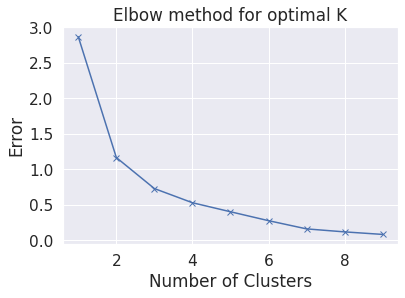

In [70]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title('Elbow method for optimal K')
plt.show()

##### In the plot above elbow is at K = 3 indicating the optimal clusters for this dataset is 3

In [71]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Fitness_grouped1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 1, 0, 0, 1, 2, 1, 0, 2], dtype=int32)

In [72]:
# add clustering labels
Borough_Fitness_Sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = New_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(Borough_Fitness_Sorted.set_index('Borough'), on='Borough')

London_merged.head() # check the last columns!

,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,E09000001,City of London,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2.0,Active Sports,Wellbeing,Recreational Sports
1,E09000002,Barking and Dagenham,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444,51.554117,0.150504,0.0,Wellbeing,Active Sports,Recreational Sports
2,E09000003,Barnet,1.000000,0.952285,0.288597,0.863426,0.966783,1.000000,0.950534,0.739259,0.601304,0.915775,0.637064,0.472872,51.653090,-0.200226,0.0,Wellbeing,Recreational Sports,Active Sports
3,E09000004,Bexley,0.627053,0.614652,0.259133,0.902778,0.591859,0.607730,0.706728,0.212024,0.208754,0.629568,0.581421,0.163853,51.441679,0.150488,1.0,Wellbeing,Recreational Sports,Active Sports
4,E09000005,Brent,0.852413,0.761262,0.493617,0.824074,0.816287,0.890502,0.653985,0.964924,0.859791,0.792014,0.505187,0.284283,51.441635,0.234519,0.0,Wellbeing,Active Sports,Recreational Sports


In [73]:
London_merged.head()

,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,E09000001,City of London,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2.0,Active Sports,Wellbeing,Recreational Sports
1,E09000002,Barking and Dagenham,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444,51.554117,0.150504,0.0,Wellbeing,Active Sports,Recreational Sports
2,E09000003,Barnet,1.000000,0.952285,0.288597,0.863426,0.966783,1.000000,0.950534,0.739259,0.601304,0.915775,0.637064,0.472872,51.653090,-0.200226,0.0,Wellbeing,Recreational Sports,Active Sports
3,E09000004,Bexley,0.627053,0.614652,0.259133,0.902778,0.591859,0.607730,0.706728,0.212024,0.208754,0.629568,0.581421,0.163853,51.441679,0.150488,1.0,Wellbeing,Recreational Sports,Active Sports
4,E09000005,Brent,0.852413,0.761262,0.493617,0.824074,0.816287,0.890502,0.653985,0.964924,0.859791,0.792014,0.505187,0.284283,51.441635,0.234519,0.0,Wellbeing,Active Sports,Recreational Sports


In [74]:
# add clustering labels
#Borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged1 = Fitnessvenues_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged1 = London_merged1.join(Borough_Fitness_Sorted.set_index('Borough'), on='Borough')

London_merged1.head() # check the last columns!

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category,Parent_CatID,Code,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,City of London,51.515618,-0.091998,4fc31eede4b05b8503be268b,Virgin Active,51.517952,-0.097651,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports
1,City of London,51.515618,-0.091998,4bf7edc04a67c928825c24cf,Barbican Conservatory,51.519859,-0.093202,Botanical Garden,Wellbeing,3,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports
2,City of London,51.515618,-0.091998,55e5df82498e9f0b8a9b9606,1Rebel,51.518378,-0.083861,Boxing Gym,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports
3,City of London,51.515618,-0.091998,51797f6be4b06c63fd263c8c,Cyclebeat,51.511686,-0.086461,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports
4,City of London,51.515618,-0.091998,53749f5c498e46fef6b4c193,1Rebel,51.515569,-0.080040,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.0,0.011798,0.025441,0.02377,0.016796,0.009649,0.019507,1.0,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports


Text(0.5, 1.0, 'Number of venues in each luster by Parent_Category')

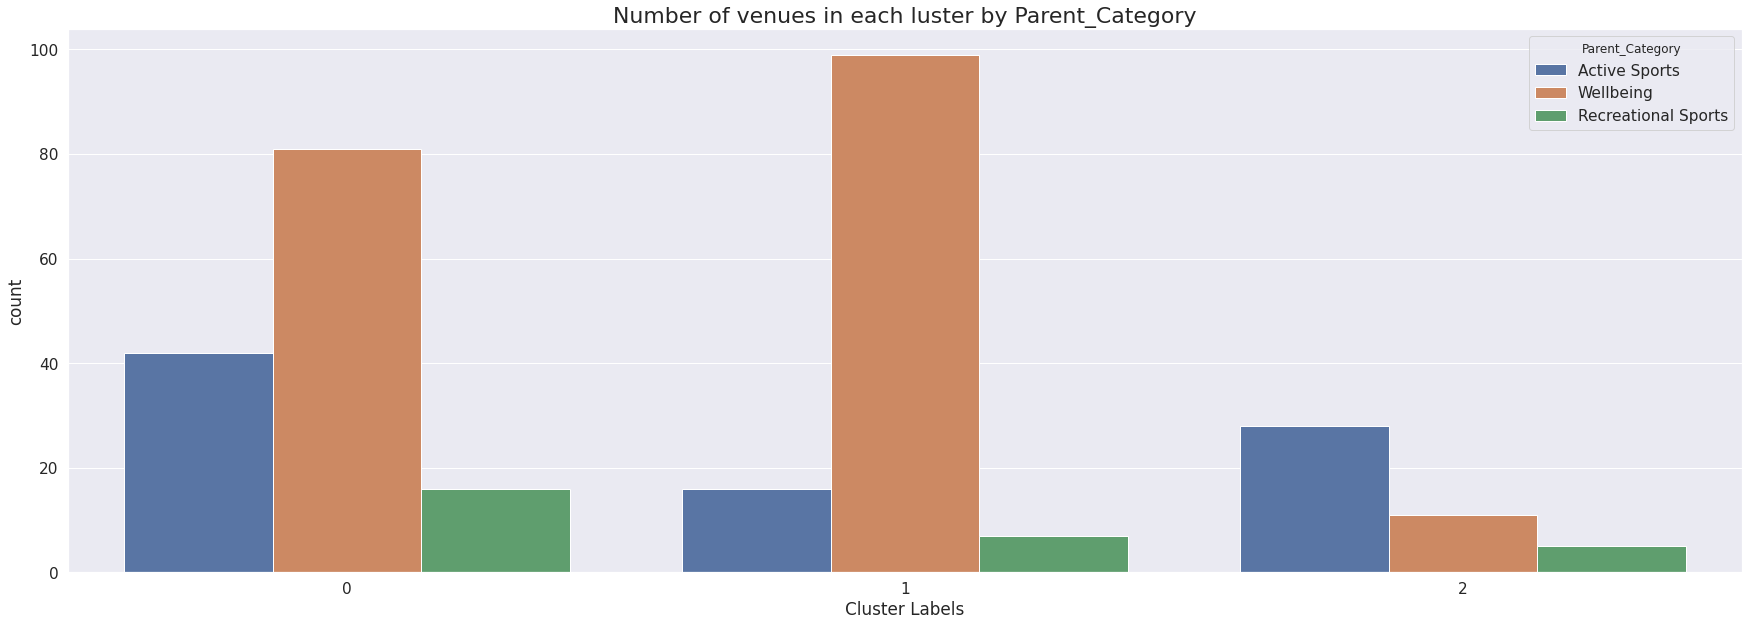

In [77]:
plt.figure(figsize = (30,10))
ax = sns.countplot(x="Cluster Labels", hue="Parent_Category", data=London_merged1)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Number of venues in each luster by Parent_Category', fontsize = 22)

In [78]:
London_merged1.groupby('Cluster Labels').count()

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category,Parent_CatID,Code,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Fitness Category Market
Cluster Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
1,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
2,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44


In [86]:
# giving appropriate names for opportunities in respective cluster label
c = {'c1': (0, 'High number of all fitness Centres'), 'c2': (1, 'High number of Wellbeing Centres'), 'c3': (2, 'High number of Active Sports Centres')}

London_merged1['Fitness Category Market'] = np.nan
for value in c.values():
    London_merged1['Fitness Category Market'].mask(London_merged1['Cluster Labels'] == value[0], value[1], inplace=True)

London_merged1.head(33)

,Borough,Borough Latitude,Borough Longitude,Venue_id,Venue,Venue Latitude,Venue Longitude,Venue Category,Parent_Category,Parent_CatID,Code,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Fitness Category Market
0,City of London,51.515618,-0.091998,4fc31eede4b05b8503be268b,Virgin Active,51.517952,-0.097651,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
1,City of London,51.515618,-0.091998,4bf7edc04a67c928825c24cf,Barbican Conservatory,51.519859,-0.093202,Botanical Garden,Wellbeing,3,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
2,City of London,51.515618,-0.091998,55e5df82498e9f0b8a9b9606,1Rebel,51.518378,-0.083861,Boxing Gym,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
3,City of London,51.515618,-0.091998,51797f6be4b06c63fd263c8c,Cyclebeat,51.511686,-0.086461,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
4,City of London,51.515618,-0.091998,53749f5c498e46fef6b4c193,1Rebel,51.515569,-0.080040,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
5,City of London,51.515618,-0.091998,4bc88fbf8b7c9c74915938cf,Thames Path,51.508810,-0.086496,Trail,Recreational Sports,2,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
6,City of London,51.515618,-0.091998,4ad3bd1ff964a5200ee620e3,St Dunstan in the East Garden,51.509716,-0.082354,Garden,Wellbeing,3,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
7,City of London,51.515618,-0.091998,512dd00de4b0255d5e792236,Ten Health & Fitness - Hatton Garden,51.520096,-0.108368,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
8,City of London,51.515618,-0.091998,584676c67b88a71edbeb3c2a,Gymbox,51.518969,-0.108972,Gym / Fitness Center,Active Sports,1,E09000001,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
9,Barking and Dagenham,51.554117,0.150504,4ac518f8f964a520d6af20e3,Central Park,51.559560,0.161981,Park,Wellbeing,3,E09000002,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444,51.554117,0.150504,0,Wellbeing,Active Sports,Recreational Sports,High number of all fitness

In [87]:
London_merged['Fitness Category Market'] = np.nan
for value in c.values():
       London_merged['Fitness Category Market'].mask(London_merged['Cluster Labels'] == value[0], value[1], inplace=True)
London_merged.dropna(inplace = True)
London_merged.head(33)

,Code,Borough,Total_Population,Number_Of_Households,Population_Density(per hectare),Average_Age,Population_Aged(0-15),Population_WorkingAge,Population_Aged(65+),Migrant_Population,BAME_Population,Employed_Population,Median_Household_Income,Number_Active_Businesses,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Fitness Category Market
0,E09000001,City of London,0.022587,0.033494,0.194728,1.000000,0.011798,0.025441,0.023770,0.016796,0.009649,0.019507,1.000000,0.471788,51.515618,-0.091998,2.0,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres
1,E09000002,Barking and Dagenham,0.536448,0.491720,0.371945,0.761574,0.668564,0.521569,0.353296,0.425866,0.413239,0.471901,0.462433,0.118444,51.554117,0.150504,0.0,Wellbeing,Active Sports,Recreational Sports,High number of all fitness Centres
2,E09000003,Barnet,1.000000,0.952285,0.288597,0.863426,0.966783,1.000000,0.950534,0.739259,0.601304,0.915775,0.637064,0.472872,51.653090,-0.200226,0.0,Wellbeing,Recreational Sports,Active Sports,High number of all fitness Centres
3,E09000004,Bexley,0.627053,0.614652,0.259133,0.902778,0.591859,0.607730,0.706728,0.212024,0.208754,0.629568,0.581421,0.163853,51.441679,0.150488,1.0,Wellbeing,Recreational Sports,Active Sports,High number of Wellbeing Centres
4,E09000005,Brent,0.852413,0.761262,0.493617,0.824074,0.816287,0.890502,0.653985,0.964924,0.859791,0.792014,0.505187,0.284283,51.441635,0.234519,0.0,Wellbeing,Active Sports,Recreational Sports,High number of all fitness Centres
5,E09000006,Bromley,0.841632,0.884235,0.140344,0.930556,0.767401,0.811806,1.000000,0.323465,0.248016,0.847258,0.676831,0.283380,51.402805,0.014814,0.0,Wellbeing,Active Sports,Recreational Sports,High number of all fitness Centres
6,E09000007,Camden,0.622433,0.677027,0.715158,0.842593,0.493385,0.680936,0.494445,0.541187,0.334870,0.575834,0.687677,0.566670,51.542305,-0.139560,1.0,Wellbeing,Active Sports,Recreational Sports,High number of Wellbeing Centres
7,E09000008,Croydon,0.992043,1.000000,0.287110,0.856481,1.000000,0.992043,0.875615,0.612537,0.770153,1.000000,0.581578,0.280581,51.371305,-0.101957,1.0,Wellbeing,Active Sports,Recreational Sports,High number of Wellbeing Centres
8,E09000009,Ealing,0.902464,0.834305,0.406764,0.837963,0.884892,0.928884,0.723022,0.898385,0.750250,0.877127,0.566960,0.337637,51.512655,-0.305195,0.0,Wellbeing,Active Sports,Recreational Sports,High number of all fitness Centres
9,E09000010,Enfield,0.854723,0.819619,0.264725,0.840278,0.892908,0.848138,0.742805,0.628272,0.562130,0.834154,0.520434,0.251422,51.652085,-0.081018,2.0,Active Sports,Wellbeing,Recreational Sports,High number of Active Sports Centres


In [88]:
London_merged['Cluster Labels'] = London_merged['Cluster Labels'].astype(int)
London_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 32
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Code                             32 non-null     object 
 1   Borough                          32 non-null     object 
 2   Total_Population                 32 non-null     float64
 3   Number_Of_Households             32 non-null     float64
 4   Population_Density(per hectare)  32 non-null     float64
 5   Average_Age                      32 non-null     float64
 6   Population_Aged(0-15)            32 non-null     float64
 7   Population_WorkingAge            32 non-null     float64
 8   Population_Aged(65+)             32 non-null     float64
 9   Migrant_Population               32 non-null     float64
 10  BAME_Population                  32 non-null     float64
 11  Employed_Population              32 non-null     float64
 12  Median_Household_Income 

In [100]:
# create map
map_clusters = folium.Map(location=[London_latitude, London_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = ('Red','Blue','Green')
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, opp, i, inc in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Borough'], London_merged['Cluster Labels'],
                                       London_merged1['Fitness Category Market'], range(0,len(London_merged1)), df_data['Median_Household_Income']  ):
    label = folium.Popup('<d1><dt>Borough: </dt>'+ "<dd>" + str(poi) + "</dd>" + '<dt>Fitness Category Market: </dt>' + "<dd>" + str(opp) + "</dd>"+ '<dt>Median Household Income: </dt>' + "<dd>" + 'GBP ' + str(inc) + "</dd>")
    folium.CircleMarker(
        [lat, lon],
        radius=London_merged.iloc[i]['Median_Household_Income']*12,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.3).add_to(map_clusters)

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Fitness Category Market</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:Green;opacity:0.7;'></span>High number of All fitness Centres</li>
    <li><span style='background:Red;opacity:0.7;'></span>High number of Wellbeing Centres</li>
    <li><span style='background:Blue;opacity:0.7;'></span>High number of Active Sports Centres</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 100%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 100%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 100%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map_clusters.get_root().add_child(macro)
    
map_clusters

## 8. Examine the Clusters

Show the number of venues in each fitness category and cluster label. Logic =
0- Recreational- good number of active & wellbeing for the given variables (population, income age etc)
1- Wellbeing - good on active and less wellbeing (*** however recreational is even lesser so may be I need to change this to 'Wellbeing and Recreational'
2- Active sports - very less active sports

In [101]:
Fitness_grouped2= FitnessVenue_onehot.groupby('Borough').sum().reset_index()

In [102]:
Fitness_grouped2['Fitness Category Market'] = London_merged['Fitness Category Market']
Fitness_grouped2['Total Population'] = New_df['Total_Population']
Fitness_grouped2['Population Density'] = New_df['Population_Density(per hectare)']
Fitness_grouped2['Median Household income'] = New_df['Median_Household_Income']

Fitness_grouped2.head()

,Borough,Active Sports,Recreational Sports,Wellbeing,Fitness Category Market,Total Population,Population Density,Median Household income
0,Barking and Dagenham,2,0,4,High number of Active Sports Centres,0.022587,0.194728,1.000000
1,Barnet,2,2,3,High number of all fitness Centres,0.536448,0.371945,0.462433
2,Bexley,0,1,4,High number of all fitness Centres,1.000000,0.288597,0.637064
3,Brent,3,0,3,High number of Wellbeing Centres,0.627053,0.259133,0.581421
4,Bromley,3,1,4,High number of all fitness Centres,0.852413,0.493617,0.505187


#### Cluster 0- High number of all fitness Centres

In [103]:
Recreational_Sports = Fitness_grouped2[Fitness_grouped2['Fitness Category Market'] == 'High number of all fitness Centres']
Recreational_Sports.head(20)

,Borough,Active Sports,Recreational Sports,Wellbeing,Fitness Category Market,Total Population,Population Density,Median Household income
1,Barnet,2,2,3,High number of all fitness Centres,0.536448,0.371945,0.462433
2,Bexley,0,1,4,High number of all fitness Centres,1.000000,0.288597,0.637064
4,Bromley,3,1,4,High number of all fitness Centres,0.852413,0.493617,0.505187
5,Camden,2,0,6,High number of all fitness Centres,0.841632,0.140344,0.676831
8,Ealing,4,0,8,High number of all fitness Centres,0.902464,0.406764,0.566960
12,Hammersmith and Fulham,5,3,8,High number of all fitness Centres,0.475616,0.726160,0.688777
13,Haringey,3,3,11,High number of all fitness Centres,0.713552,0.603545,0.556743
15,Havering,1,0,1,High number of all fitness Centres,0.652721,0.145448,0.576391
18,Islington,2,2,4,High number of all fitness Centres,0.593429,1.000000,0.625432
19,Kensington and Chelsea,3,0,7,High number of all fitness Centres,0.408111,0.842721,0.874253


#### Cluster 1- High number of Wellbeing Centres

In [104]:
Wellbeing = Fitness_grouped2[Fitness_grouped2['Fitness Category Market'] == 'High number of Wellbeing Centres']
Wellbeing.head(20)

,Borough,Active Sports,Recreational Sports,Wellbeing,Fitness Category Market,Total Population,Population Density,Median Household income
3,Brent,3,0,3,High number of Wellbeing Centres,0.627053,0.259133,0.581421
6,City of London,6,1,2,High number of Wellbeing Centres,0.622433,0.715158,0.687677
7,Croydon,1,0,8,High number of Wellbeing Centres,0.992043,0.287110,0.581578
10,Greenwich,1,3,10,High number of Wellbeing Centres,0.718943,0.380254,0.555643
11,Hackney,1,0,7,High number of Wellbeing Centres,0.704055,0.925308,0.552342
21,Lambeth,1,0,6,High number of Wellbeing Centres,0.844199,0.788315,0.604998
22,Lewisham,1,0,9,High number of Wellbeing Centres,0.778747,0.554667,0.564288
25,Redbridge,1,0,6,High number of Wellbeing Centres,0.780801,0.346471,0.579378
26,Richmond upon Thames,1,0,15,High number of Wellbeing Centres,0.506417,0.220850,0.840459
27,Southwark,2,1,8,High number of Wellbeing Centres,0.806725,0.699763,0.583150


#### Cluster 2- High number of Active Sports Centres

In [105]:
Active_Sports = Fitness_grouped2[Fitness_grouped2['Fitness Category Market'] == 'High number of Active Sports Centres']
Active_Sports.head(20)

,Borough,Active Sports,Recreational Sports,Wellbeing,Fitness Category Market,Total Population,Population Density,Median Household income
0,Barking and Dagenham,2,0,4,High number of Active Sports Centres,0.022587,0.194728,1.000000
9,Enfield,4,2,2,High number of Active Sports Centres,0.854723,0.264725,0.520434
14,Harrow,4,2,2,High number of Active Sports Centres,0.647587,0.321277,0.611129
16,Hillingdon,5,0,2,High number of Active Sports Centres,0.772587,0.167171,0.582207
17,Hounslow,9,0,3,High number of Active Sports Centres,0.703799,0.314763,0.555329


#### Results & Discussion

Based on initial data analysis we were able to segregate London boroughs into three clusters with clear indication of current market on fitness centres. This will help fitness service provider to focus on specific boroughs based on fitness service they are offering.
Although at a very high level but we also observed certain opportunities that are worth exploring further. For e.g. when we compare Cluster 1- ‘High number of Wellbeing Centres’ & Cluster 2 – ‘High number of Active Sports Centres’ boroughs; there are multiple boroughs in Cluster 2 like ‘Croydon’, ‘Hackney’, ‘Lewisham’ with good potential for ‘Active Sports Centre’
Based on initial data analysis we were able to segregate London boroughs into three clusters with clear indication of current market on fitness centres. This will help fitness service provider to focus on specific boroughs based on fitness service they are offering.
Although at a very high level but we also observed certain opportunities that are worth exploring further. For e.g. when we compare Cluster 1- ‘High number of Wellbeing Centres’ & Cluster 2 – ‘High number of Active Sports Centres’ boroughs; there are multiple boroughs in Cluster 2 like ‘Croydon’, ‘Hackney’, ‘Lewisham’ with good potential for ‘Active Sports Centre’.

#### Conclusion

In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data. We performed machine learning algorithm and clustered the data into 3 clusters based on their similarities.
We also provided high level recommendation to relevant stakeholders i.e. fitness service providers regarding locations worth exploring further using relevant variable like income, population density, average age, commercial property price etc. This will help them in identifying high potential locations where they can capitalize the opportunities. 
